In [1]:
from __future__ import division, print_function
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# change cwd based on OS # ToDO
import os
print(os.getcwd())
path = str(os.getcwd())

/Users/stefan/Code/nanodegree/p5/final_project


In [3]:
# load data    
if path == "/Users/stefan/Code/nanodegree/p5/final_project":
    f = "./final_project_dataset.pkl"

elif "v093216" in path:
    f = "D:/DATA/v093216/GIT/nanodegree/p5/final_project/final_project_dataset.pkl"

else:
    f = "./final_project/final_project_dataset.pkl"
    
with open(f, "rb") as data_file:
    data_dict = pickle.load(data_file)

# Remove TOTAL
data_dict.pop("TOTAL", 0)

# Remove previously identified outliers
data_dict.pop("LAY KENNETH L", 0)
data_dict.pop("SKILLING JEFFREY K", 0)

# Remove outlier identified during anaylsis
data_dict.pop("LAVORATO JOHN J", 0)
data_dict.pop("BELFER ROBERT", 0)

{'bonus': 'NaN',
 'deferral_payments': -102500,
 'deferred_income': 'NaN',
 'director_fees': 3285,
 'email_address': 'NaN',
 'exercised_stock_options': 3285,
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 44093,
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 102500,
 'total_stock_value': -44093}

In [4]:
# extract features
from collections import defaultdict
features = defaultdict(list)

for k, v in data_dict.iteritems():
    for k2, v2 in v.iteritems():
        if v2 == "NaN":
            features[k2].append(np.nan)
        else:
            features[k2].append(v2)

In [5]:
# supress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# load features into df
df = pd.DataFrame(features)
print(df.shape)
print(df.dtypes)

(141, 21)
bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                             bool
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object


In [6]:
# drop email column
df.drop(["email_address"], axis=1, inplace=True)

In [7]:
for c in df.columns:
    print(df[c].describe())

count        78.00
mean     983892.55
std      907348.31
min       70000.00
25%      406250.00
50%      750000.00
75%     1100000.00
max     5249999.00
Name: bonus, dtype: float64
count        36.00
mean     885569.03
std     1310814.45
min        7961.00
25%       83501.50
50%      243952.00
75%      938989.25
max     6426990.00
Name: deferral_payments, dtype: float64
count         47.00
mean     -587029.60
std       951340.06
min     -3504386.00
25%      -639093.50
50%      -144062.00
75%       -37506.00
max         -833.00
Name: deferred_income, dtype: float64
count       15.00
mean     95592.07
std      35219.47
min      17500.00
25%     100017.00
50%     108579.00
75%     113138.00
max     137864.00
Name: director_fees, dtype: float64
count         97.00
mean     2486132.18
std      4259595.40
min         9803.00
25%       506765.00
50%      1104054.00
75%      2282768.00
max     30766064.00
Name: exercised_stock_options, dtype: float64
count       91.00
mean     54014.77
std     

In [8]:
# create new features
df["performance_compensation"] = df["bonus"] + df["exercised_stock_options"] + df["total_stock_value"]
df["poi_communication"] = df["from_poi_to_this_person"] + df["from_this_person_to_poi"] / df["from_messages"] + df["to_messages"] + 1 # hack to circument zero-division error
    
df.shape

(141, 22)

In [11]:
df.corr()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,performance_compensation,poi_communication
bonus,1.00,0.54,-0.66,nan,0.11,0.04,0.05,0.41,0.30,1.00,...,0.25,0.03,0.12,0.24,0.59,0.35,0.54,0.12,0.22,0.35
deferral_payments,0.54,1.00,-0.88,nan,0.11,0.04,0.31,0.45,0.20,nan,...,-0.08,0.64,-0.22,0.70,0.40,0.37,0.80,0.24,0.74,0.38
deferred_income,-0.66,-0.88,1.00,-0.46,-0.67,0.09,-0.31,-0.19,-0.27,nan,...,-0.29,-0.48,0.17,-0.51,-0.42,-0.40,-0.57,-0.69,-0.74,-0.39
director_fees,nan,nan,-0.46,1.00,0.97,-0.50,1.00,nan,1.00,nan,...,nan,-0.97,0.97,nan,1.00,-1.00,0.36,0.77,nan,-1.00
exercised_stock_options,0.11,0.11,-0.67,0.97,1.00,-0.05,-0.05,0.15,-0.04,1.00,...,0.38,0.41,-0.07,0.21,0.04,-0.04,0.07,0.94,0.96,-0.04
expenses,0.04,0.04,0.09,-0.50,-0.05,1.00,0.10,-0.07,0.03,1.00,...,0.05,-0.01,0.04,0.17,0.24,0.16,0.07,-0.03,-0.11,0.16
from_messages,0.05,0.31,-0.31,1.00,-0.05,0.10,1.00,0.15,0.60,-1.00,...,-0.06,0.09,-0.33,0.05,0.22,0.47,-0.01,-0.00,-0.04,0.47
from_poi_to_this_person,0.41,0.45,-0.19,nan,0.15,-0.07,0.15,1.00,0.29,1.00,...,0.22,0.17,-0.46,0.22,0.64,0.50,0.23,0.14,0.17,0.52
from_this_person_to_poi,0.30,0.20,-0.27,1.00,-0.04,0.03,0.60,0.29,1.00,1.00,...,0.16,0.17,-0.40,0.06,0.43,0.55,0.07,0.03,0.03,0.55
loan_advances,1.00,nan,nan,nan,1.00,1.00,-1.00,1.00,1.00,1.00,...,nan,nan,nan,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [15]:
# drop colums with low corr
to_drop = ["deferral_payments", "deferred_income", "director_fees", "expenses",
           "loan_advances", "other", "restricted_stock", "restricted_stock_deferred", "salary", 
          "to_messages", "total_payments","from_messages", "from_this_person_to_poi",
           "performance_compensation", "poi_communication"]
df_features = df.drop(to_drop, axis=1)
df_features.shape

(141, 7)

In [16]:
df_features.describe()

,bonus,exercised_stock_options,from_poi_to_this_person,long_term_incentive,shared_receipt_with_poi,total_stock_value
count,78.00,97.00,83.00,62.00,83.00,121.00
mean,983892.55,2486132.18,58.34,660750.77,1117.60,2799027.50
std,907348.31,4259595.40,71.66,768428.64,1146.03,4680926.62
min,70000.00,9803.00,0.00,69223.00,2.00,28798.00
25%,406250.00,506765.00,10.00,275000.00,224.00,494136.00
50%,750000.00,1104054.00,35.00,395480.50,728.00,1080988.00
75%,1100000.00,2282768.00,65.00,751112.00,1667.00,2493616.00
max,5249999.00,30766064.00,305.00,5145434.00,5521.00,30766064.00


In [35]:
# outlier seems to be LAVORATO JOHN J
# negative total_stock_value is associated with BELFER ROBERT
for k,v in data_dict.iteritems():
    if k == "THE TRAVEL AGENCY IN THE PARK" or k == "LOCKHART EUGENE E":
        print(k,v)

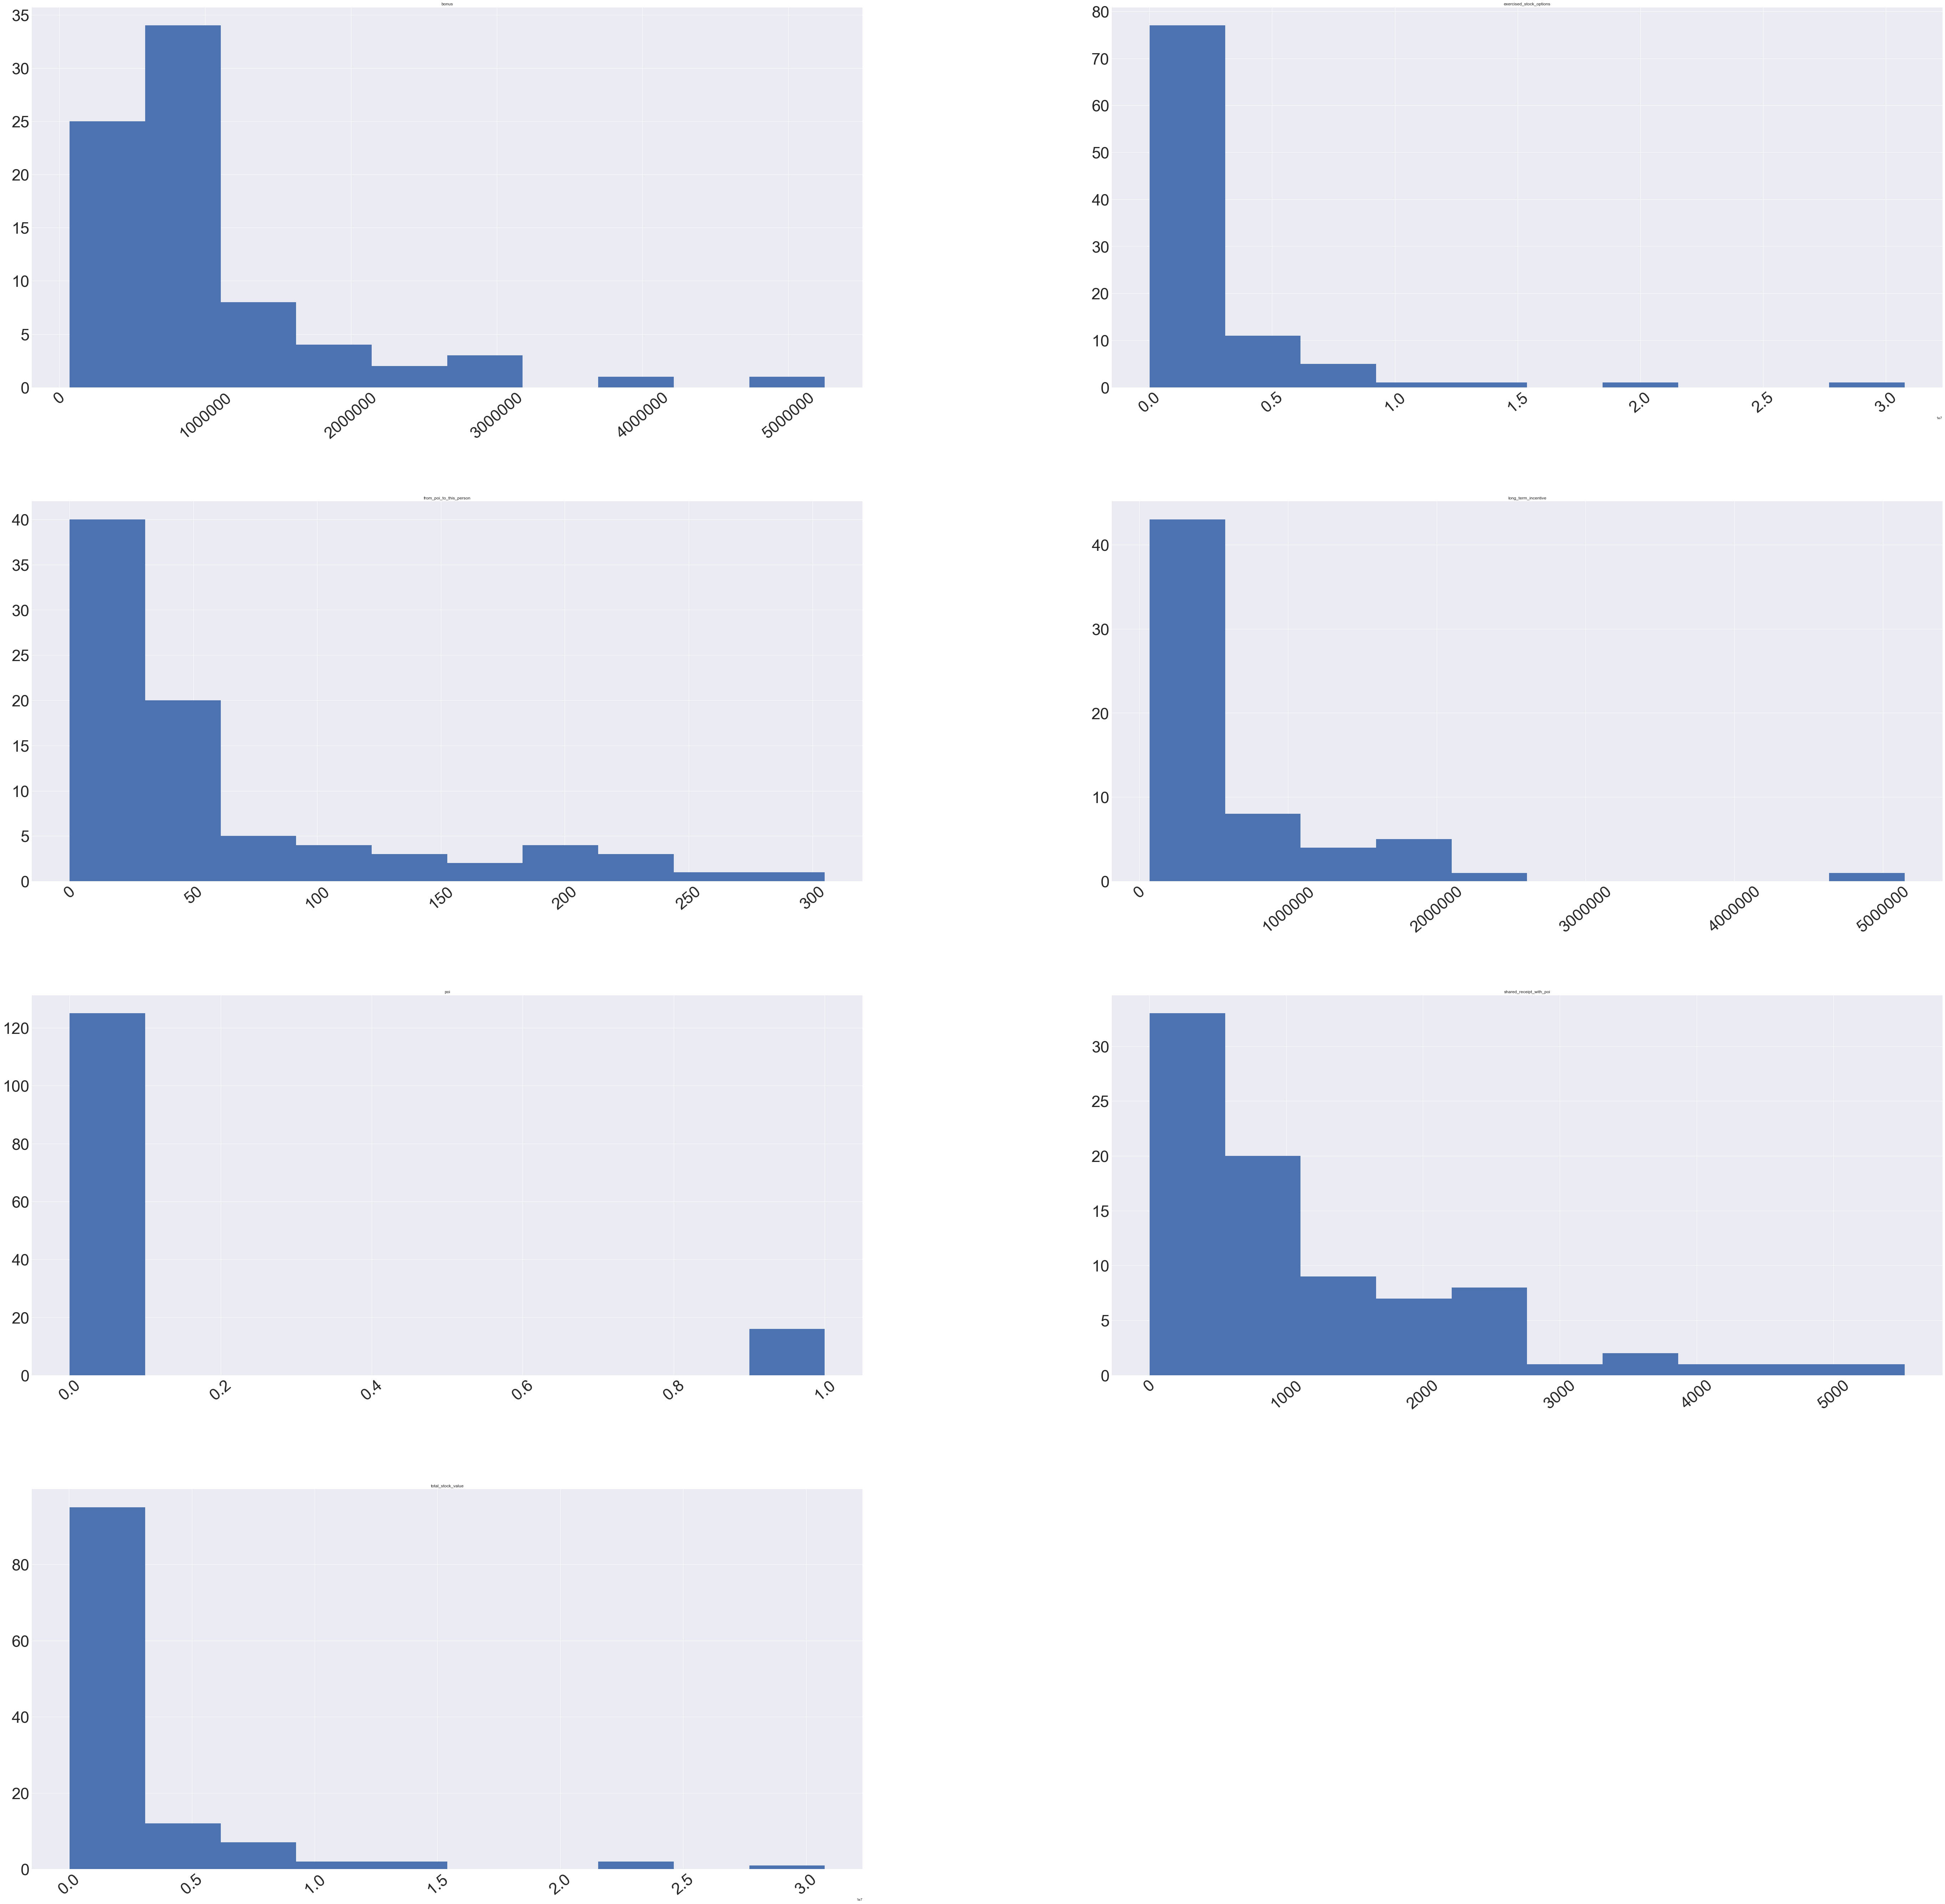

In [99]:
_ = df_features.hist(bins=10, figsize=(96,96), xlabelsize=45, ylabelsize=45, xrot=40, layout=(4,2))

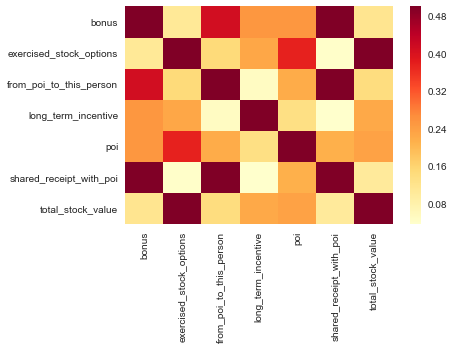

In [31]:
sns.heatmap(df_features.corr(), cmap="YlOrRd", vmax=0.5)

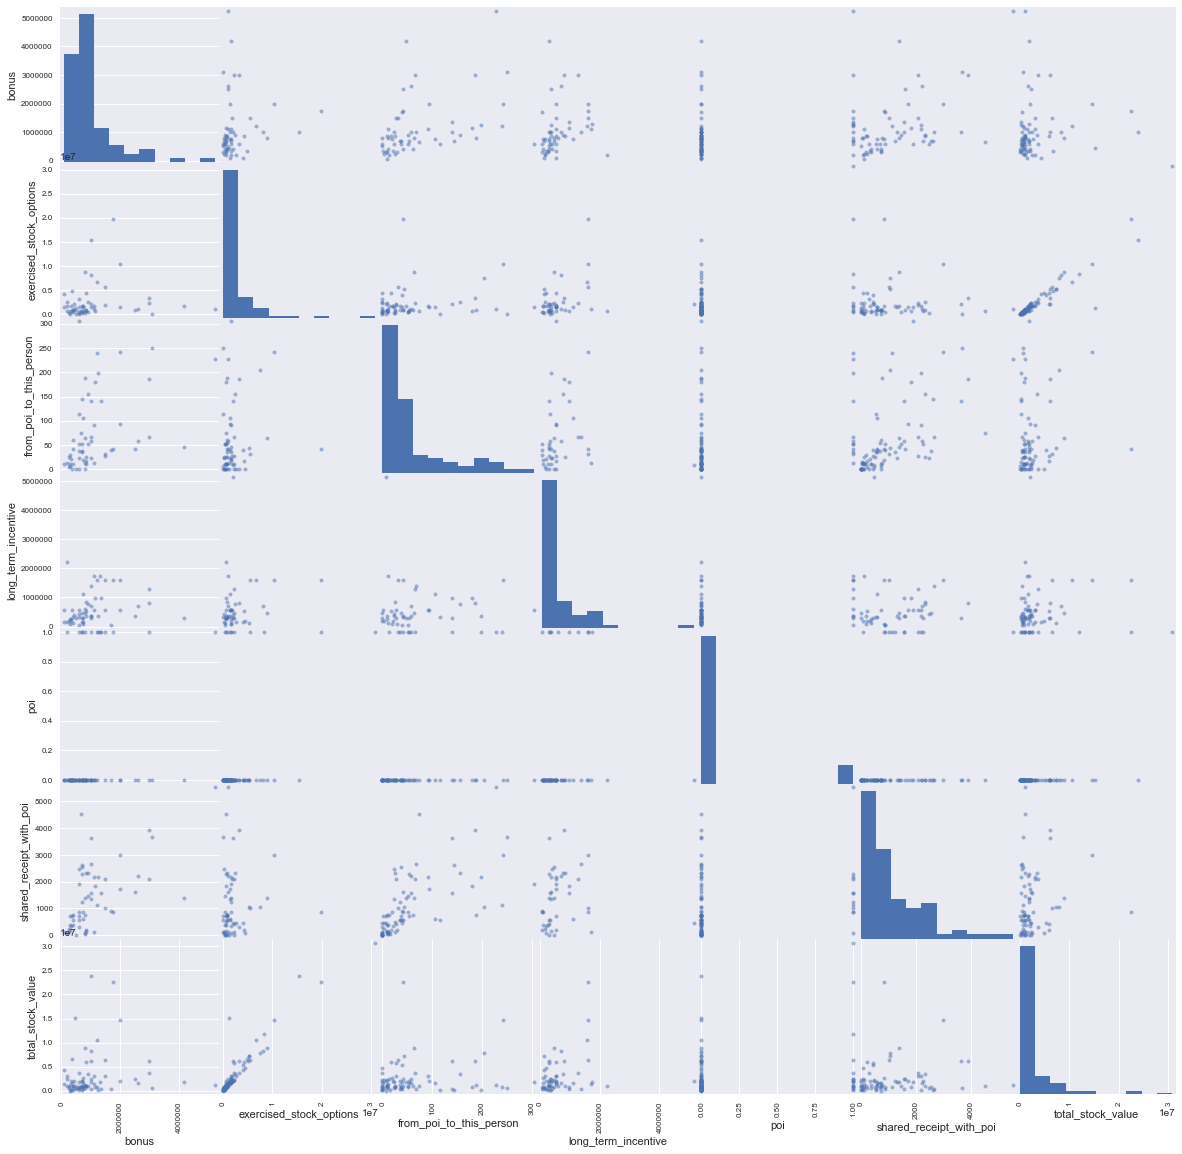

In [100]:
from pandas import scatter_matrix
_ = scatter_matrix(df_features, alpha=0.5, figsize=(20, 20))

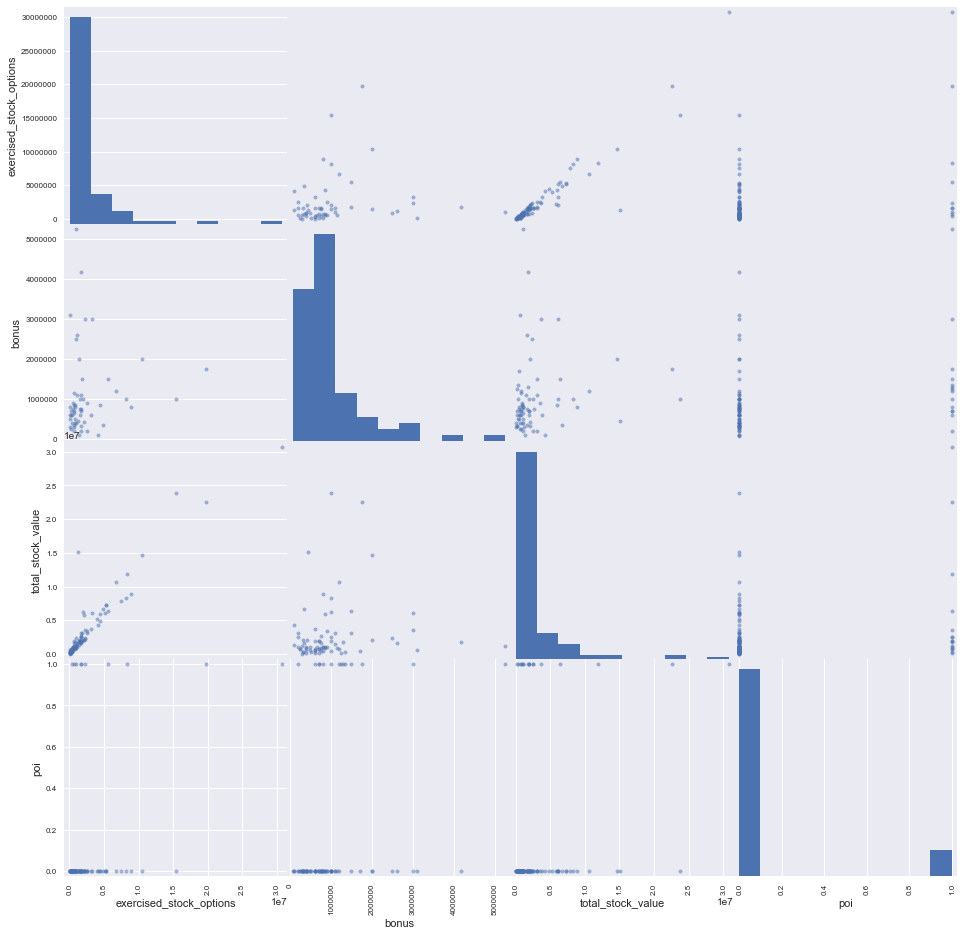

In [101]:
_ = scatter_matrix(df_features[["exercised_stock_options", "bonus", "total_stock_value", "poi"]], alpha = 0.5, figsize=(16,16))